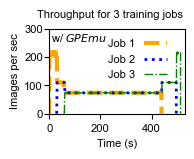

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fontsize=8

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = fontsize

fig = plt.gcf()
fig.set_size_inches(1.75, 1.1)


columns = ['app_id', 'batch', 'time', 'throughput']

t0 = 1704567921.1334465

colors = ['orange', 'blue', 'green']
linestyles = ['--', ':', '-.']
linewidths = [3,2,1]

x = []
y = []

for i in range(3):
    filename = 'app{}.csv'.format(i+1)
    df = pd.read_csv(filename, sep='\t', names=columns)
    times = df['time'].tolist()
    times = [float(t)-t0 for t in times]
    x.append(times)
    throughput = df['throughput'].tolist()
    y.append(throughput)
    plt.plot(times, throughput, markersize=2, linestyle=linestyles[i], color=colors[i], lw=linewidths[i], label='Job {}'.format(i+1))

common_x = np.sort(np.unique(np.concatenate((x[0], x[1], x[2]))))
interpolated_y0 = np.interp(common_x, x[0], y[0])
interpolated_y1 = np.interp(common_x, x[1], y[1])
interpolated_y2 = np.interp(common_x, x[2], y[2])

aggregated_data = interpolated_y0 + interpolated_y1 + interpolated_y2
# plt.plot(common_x, aggregated_data, markersize=2, linestyle='-', color='black', lw=3, label='Aggregate'.format(i+1))

plt.annotate("w/ $GPEmu$", xy=(5, 250), xytext=(7, 255))

plt.ylim(0,300)
plt.xlim(0,530)
# Adding labels and title
# xticks = [256,512,1024]
# yticks = [20,40,60,80]
# plt.xticks(xticks, fontsize=fontsize)
# plt.yticks(yticks, fontsize=fontsize)
plt.xlabel('Time (s)', fontsize=fontsize)
plt.ylabel('Images per sec', fontsize=fontsize, labelpad=3)
title = plt.title('Throughput for 3 training jobs',fontsize=fontsize, pad=8)
plt.tick_params(axis='y', which='both', pad=1)
title.set_position([0.45, 1.05])  # Adjust the values as needed


fig.set_dpi(100)
plt.legend(fontsize=fontsize, loc='upper center', markerfirst=False, frameon=False, bbox_to_anchor=(0.65, 1))
plt.savefig('fig.png',  bbox_inches='tight')
plt.savefig('fig.eps',  bbox_inches='tight')